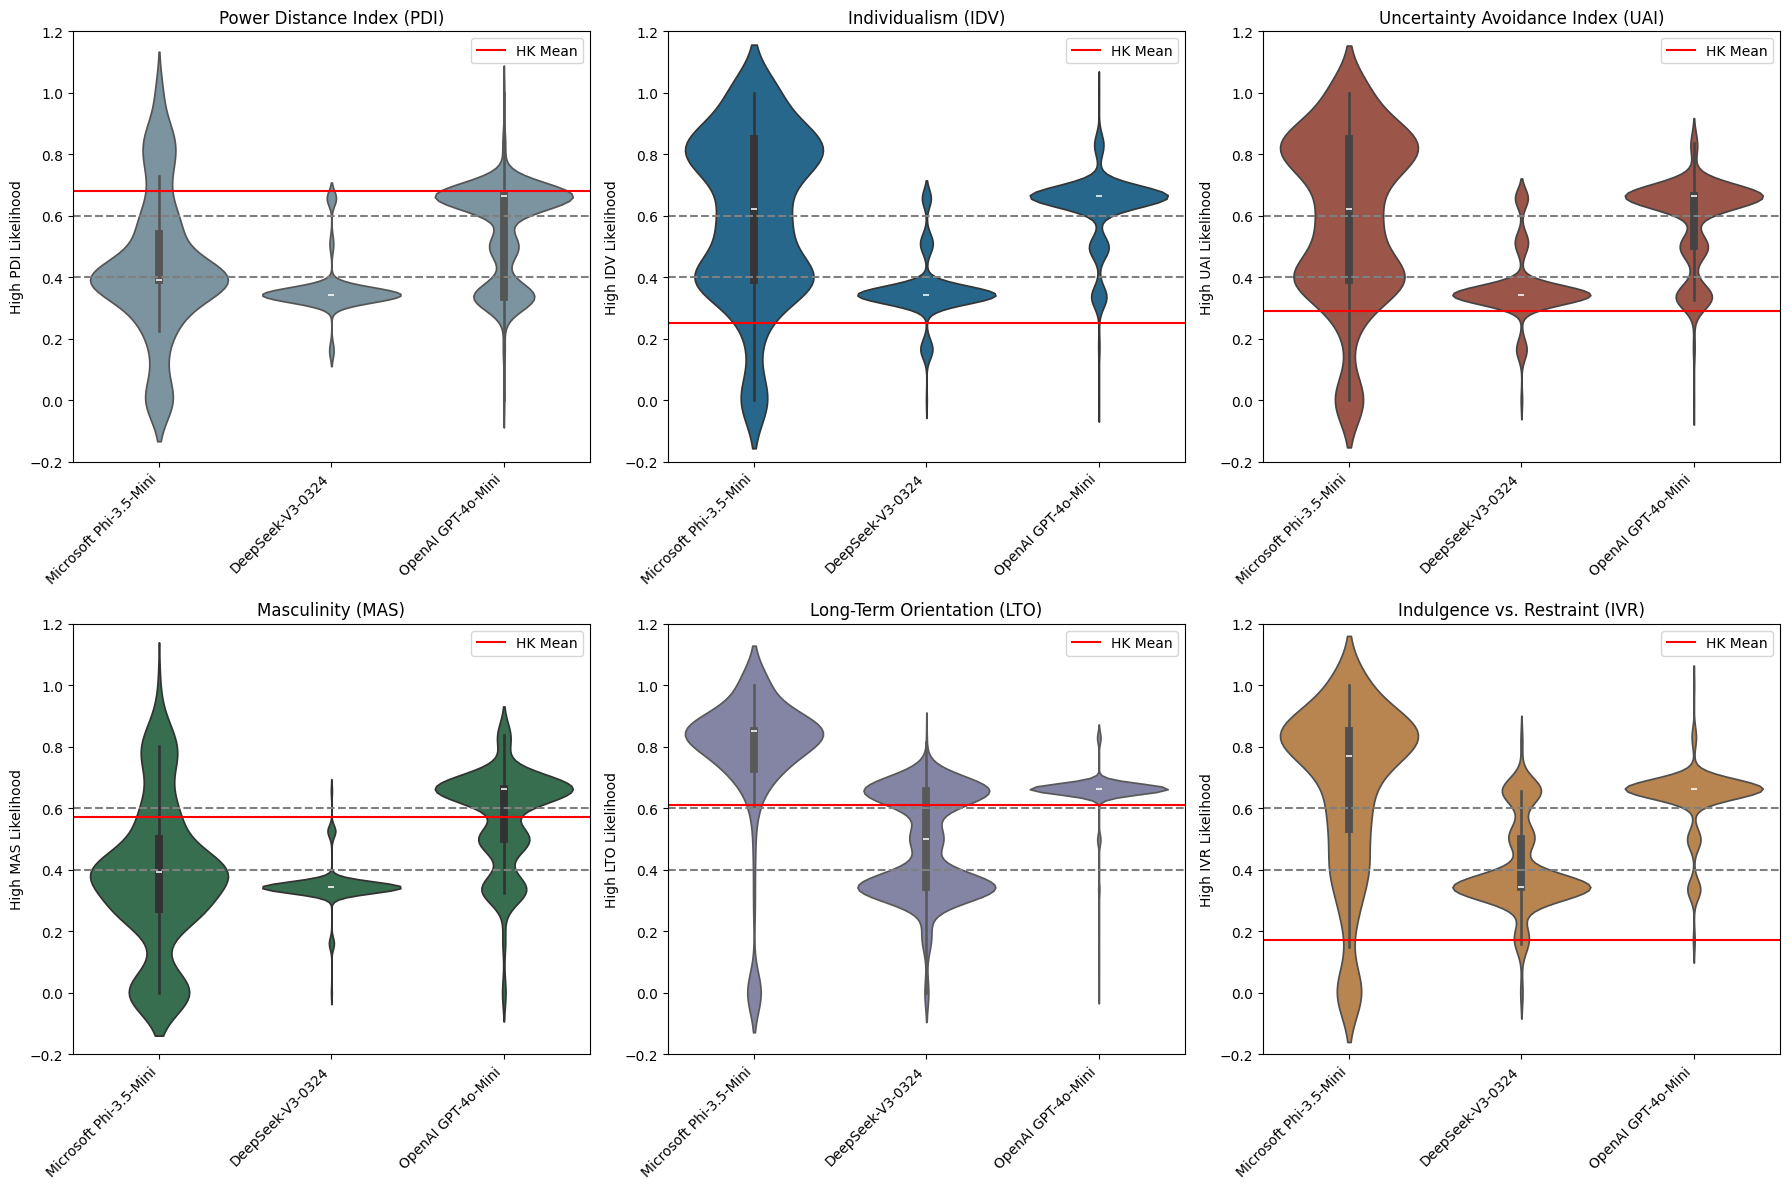

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# Edit the following constants to change the models and responses files
MODEL1_NAME = "Microsoft Phi-3.5-Mini"
MODEL2_NAME = "DeepSeek-V3-0324"
MODEL3_NAME = "OpenAI GPT-4o-Mini"

MODEL1_RESULTS_PATH = "../data/phi-35-mini-scores.json"
MODEL2_RESULTS_PATH = "../data/deepseek-v3-0324.json"
MODEL3_RESULTS_PATH = "../data/gpt-4o-mini.json"

# Load all models' results
with open(MODEL1_RESULTS_PATH, "r") as f:
    model1_results = json.load(f)

with open(MODEL2_RESULTS_PATH, "r") as f:
    model2_results = json.load(f)

with open(MODEL3_RESULTS_PATH, "r") as f:
    model3_results = json.load(f)

# Create individual plots for each dimension
dimensions = ['PDI', 'IDV', 'UAI', 'MAS', 'LTO', 'IVR']
hk_means = {'PDI': 0.68, 'IDV': 0.25, 'UAI': 0.29, 'MAS': 0.57, 'LTO': 0.61, 'IVR': 0.17}
colors = {'PDI': '#7596a5', 'IDV': '#166c9c', 'UAI': '#a94b3b', 'MAS': '#2f774f', 'LTO': '#7f7eaa', 'IVR': '#ca863e'}

# Create a 3x2 grid for the plots (3 in a row)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array to make indexing easier

# Create a mapping for full names
full_names = {
    'PDI': 'Power Distance Index',
    'IDV': 'Individualism',
    'UAI': 'Uncertainty Avoidance Index',
    'MAS': 'Masculinity',
    'LTO': 'Long-Term Orientation',
    'IVR': 'Indulgence vs. Restraint'
}

for i, dimension in enumerate(dimensions):
    ax = axes[i]
    
    # Check if dimension exists in results
    data_to_plot = []
    if dimension in model1_results:
        data_to_plot.append(model1_results[dimension])
    else:
        data_to_plot.append([])
        
    if dimension in model2_results:
        data_to_plot.append(model2_results[dimension])
    else:
        data_to_plot.append([])
    
    if dimension in model3_results:
        data_to_plot.append(model3_results[dimension])
    else:
        data_to_plot.append([])
    
    # Create violin plots for all models with the same color for the dimension
    sns.violinplot(data=data_to_plot, ax=ax, palette=[colors[dimension], colors[dimension], colors[dimension]])
    
    # Set labels and formatting
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], rotation=45, ha='right')
    ax.set_ylabel(f'High {dimension} Likelihood')
    ax.set_ylim(-0.2, 1.2)
    ax.axhline(0.4, linestyle='--', color='gray')
    ax.axhline(0.6, linestyle='--', color='gray')
    ax.axhline(hk_means[dimension], linestyle='-', color='red', label='HK Mean')
    ax.set_title(f'{full_names[dimension]} ({dimension})')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create a radar chart to visualize the cultural dimensions
import numpy as np
import plotly.graph_objects as go

# Prepare data for radar chart
dimensions_count = len(dimensions)
angles = np.linspace(0, 2*np.pi, dimensions_count, endpoint=False).tolist()

# Define paths for different models
MODEL1_RESULTS_PATH = "../data/gpt-4o-mini.json"
MODEL2_RESULTS_PATH = "../data/DeepSeek-V3-0324.json"  # Path to second model's results

# Load both models' results
with open(MODEL1_RESULTS_PATH, "r") as f:
    model1_results = json.load(f)

with open(MODEL2_RESULTS_PATH, "r") as f:
    model2_results = json.load(f)

# Convert results to proper format
model1_values = []
model2_values = []

for dim in dimensions:
    # Process model1 results
    if dim in model1_results:
        # Always calculate the mean regardless of structure
        if isinstance(model1_results[dim], list):
            model1_values.append(float(np.mean(model1_results[dim])))
        elif isinstance(model1_results[dim], dict) and 'value' in model1_results[dim]:
            # If it's a dict with 'value', use that value
            model1_values.append(float(model1_results[dim]['value']))
        else:
            # If it's a single value, use it directly
            model1_values.append(float(model1_results[dim]))
    else:
        model1_values.append(0.0)
    
    # Process model2 results
    if dim in model2_results:
        # Always calculate the mean regardless of structure
        if isinstance(model2_results[dim], list):
            model2_values.append(float(np.mean(model2_results[dim])))
        elif isinstance(model2_results[dim], dict) and 'value' in model2_results[dim]:
            # If it's a dict with 'value', use that value
            model2_values.append(float(model2_results[dim]['value']))
        else:
            # If it's a single value, use it directly
            model2_values.append(float(model2_results[dim]))
    else:
        model2_values.append(0.0)

# Get values from hk_means
hk_values = [float(hk_means[dim]) for dim in dimensions]

# Create radar chart using plotly
fig = go.Figure()

# Add trace for Model 1
fig.add_trace(go.Scatterpolar(
    r=model1_values,
    theta=dimensions,
    fill='toself',
    name="OpenAI GPT-4o-Mini",
    line_color='#4d6bfe',
    opacity=0.7
))

# Add trace for Model 2
fig.add_trace(go.Scatterpolar(
    r=model2_values,
    theta=dimensions,
    fill='toself',
    name="DeepSeek v3-0324",
    line_color='#8a2be2',
    opacity=0.7
))

# Add trace for Hofstede values (HK means)
fig.add_trace(go.Scatterpolar(
    r=hk_values,
    theta=dimensions,
    fill='toself',
    name='Hong Kong Values',
    line_color='red',
    opacity=0.5
))

# Update layout with title and polar chart settings
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="center",
        x=0.5
    ),
    annotations=[
        dict(
            text=full_names[dim],
            x=0.5 + 0.45 * np.cos(i * 2 * np.pi / dimensions_count),
            y=0.5 + 0.45 * np.sin(i * 2 * np.pi / dimensions_count),
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=10)
        ) for i, dim in enumerate(dimensions)
    ]
)

# Print values for debugging
print("OpenAI GPT-4o-Mini values:", dict(zip(dimensions, model1_values)))
print("DeepSeek v3-0324 values:", dict(zip(dimensions, model2_values)))
print("HK values:", hk_means)

fig.show()